In [1]:
#Khai báo các thư viện cần sử dụng
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Gao/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 556 images belonging to 6 classes.


In [5]:
# Tạo bộ dữ liệu test
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Gao/Val', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 36 images belonging to 6 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'Arborio': 0,
 'Basmati': 1,
 'Gao luc': 2,
 'Ipsala': 3,
 'Jasmine': 4,
 'Karacadag': 5}

In [7]:
# Các nhãn có trong bộ dữ liệu test
val_set.class_indices

{'Arborio': 0,
 'Basmati': 1,
 'Gao luc': 2,
 'Ipsala': 3,
 'Jasmine': 4,
 'Karacadag': 5}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [9]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:

history=model.fit(training_set,epochs=20,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/20
18/18 [==============================] - 187s 10s/step - loss: 1.2727 - accuracy: 0.4856 - val_loss: 0.7277 - val_accuracy: 0.8333
Epoch 2/20
18/18 [==============================] - 174s 10s/step - loss: 0.7329 - accuracy: 0.7266 - val_loss: 0.7426 - val_accuracy: 0.7500
Epoch 3/20
18/18 [==============================] - 171s 9s/step - loss: 0.5811 - accuracy: 0.7788 - val_loss: 0.5476 - val_accuracy: 0.8056
Epoch 4/20
18/18 [==============================] - 178s 10s/step - loss: 0.4088 - accuracy: 0.8363 - val_loss: 0.2836 - val_accuracy: 0.8333
Epoch 5/20
18/18 [==============================] - 176s 10s/step - loss: 0.4103 - accuracy: 0.8291 - val_loss: 0.2737 - val_accuracy: 0.8889
Epoch 6/20
18/18 [==============================] - 176s 10s/step - loss: 0.3236 - accuracy: 0.8687 - val_loss: 0.1443 - val_accuracy: 1.0000
Epoch 7/20
18/18 [==============================] - 177s 10s/step - loss: 0.3852 - accuracy: 0.8615 - val_loss: 0.1263 - val_accuracy: 0.9722
Epoch 8

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.2394779622554779
Train Accuracy 0.9100719690322876


<function matplotlib.pyplot.show(*args, **kw)>

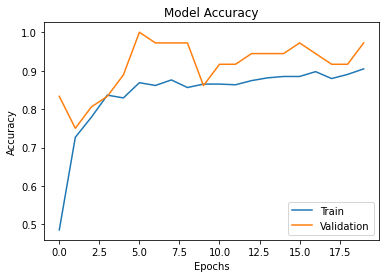

In [12]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
# Lưu lại
model.save("Gao.h5")

In [14]:
# Tải mô hình 
model_rice=load_model('Gao.h5')

1/1 [==============================] - 0s 334ms/step
Basmati (53).jpg
Basmati


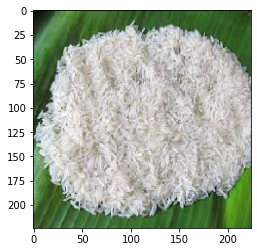

1/1 [==============================] - 0s 400ms/step
Basmati (54).jpg
Basmati


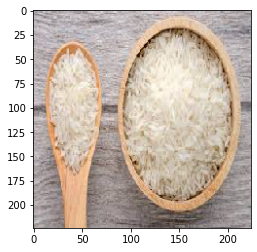

1/1 [==============================] - 0s 349ms/step
Gaoluc (83).jpg
Gao luc


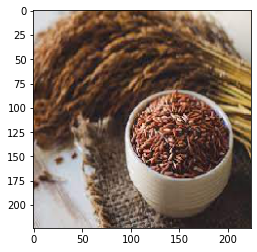

1/1 [==============================] - 0s 105ms/step
Gaoluc (84).jpg
Gao luc


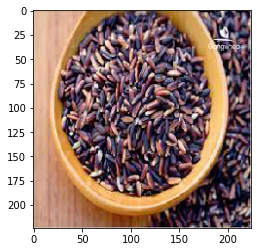

1/1 [==============================] - 0s 104ms/step
Gaoluc (85).jpg
Gao luc


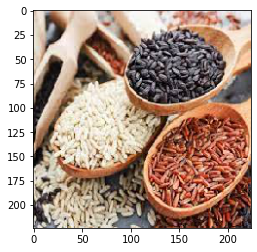

1/1 [==============================] - 0s 110ms/step
Ipsala (91).jpg
Ipsala


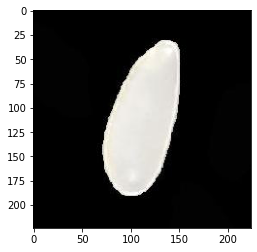

1/1 [==============================] - 0s 104ms/step
Ipsala (92).jpg
Ipsala


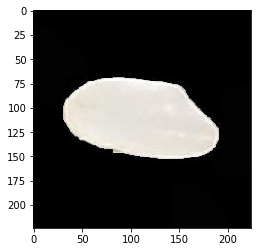

1/1 [==============================] - 0s 102ms/step
Ipsala (93).jpg
Ipsala


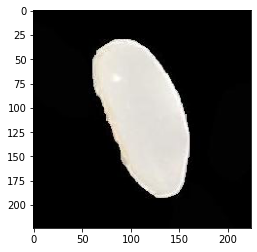

1/1 [==============================] - 0s 101ms/step
Jasmine (99).jpg
Jasmine


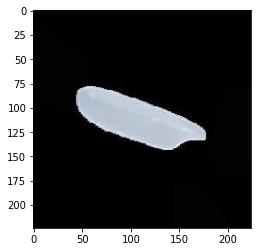

1/1 [==============================] - 0s 96ms/step
Jasmine (100).jpg
Jasmine


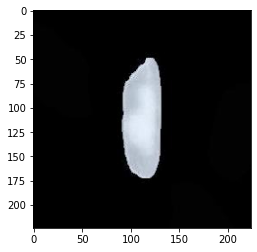

1/1 [==============================] - 0s 116ms/step
Jasmine (101).jpg
Jasmine


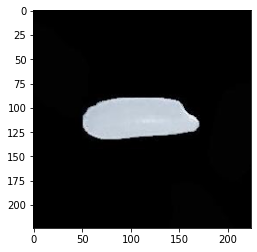

1/1 [==============================] - 0s 107ms/step
Karacadag (110).jpg
Karacadag


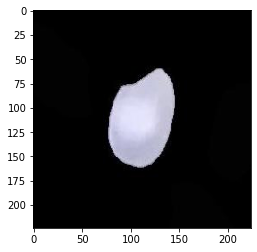

1/1 [==============================] - 0s 107ms/step
Karacadag (111).jpg
Karacadag


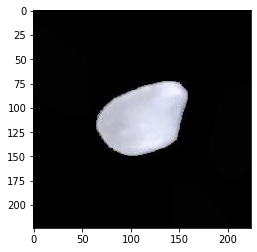

1/1 [==============================] - 0s 109ms/step
Karacadag (112).jpg
Karacadag


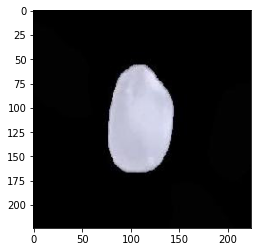

1/1 [==============================] - 0s 114ms/step
Arborio (103).jpg
Arborio


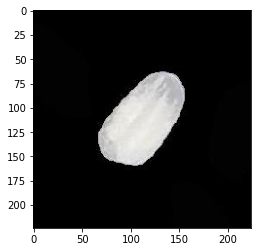

1/1 [==============================] - 0s 105ms/step
Arborio (104).jpg
Arborio


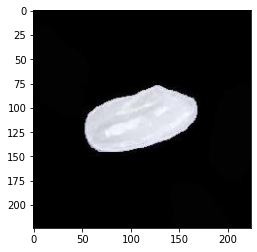

1/1 [==============================] - 0s 96ms/step
Arborio (105).jpg
Arborio


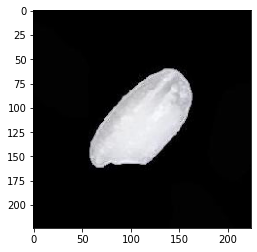

1/1 [==============================] - 0s 99ms/step
Basmati (92).jpg
Basmati


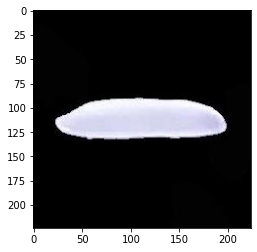

1/1 [==============================] - 0s 105ms/step
Basmati (94).jpg
Basmati


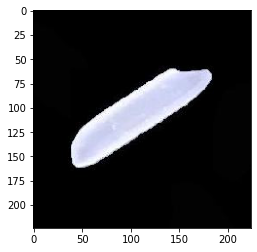

1/1 [==============================] - 0s 104ms/step
Basmati (93).jpg
Basmati


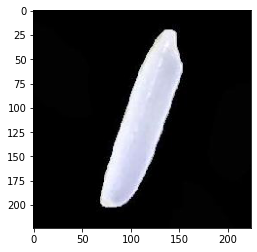

In [23]:
import os
# Tạo bộ dữ liệu test
test = '/content/drive/My Drive/Colab Notebooks/BTVN/Gao/Test/Test1'
dict = list(training_set.class_indices.keys())

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_rice.predict(img)

  for j in (range(len(result[0]))):
    if round(result[0][j])==1:
      prediction=dict[j]
      print(i)
      print(prediction)
      plt.show()
  

In [ ]:
!jupyter nbconvert --to html "/content/Nhận_dạng_tiền.ipynb"
